In [1]:
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Wholesale customers data.csv")
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [3]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [4]:
df.isnull()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
435,False,False,False,False,False,False,False,False
436,False,False,False,False,False,False,False,False
437,False,False,False,False,False,False,False,False
438,False,False,False,False,False,False,False,False


In [5]:
df.sum()

,0
Channel,582
Region,1119
Fresh,5280131
Milk,2550357
Grocery,3498562
Frozen,1351650
Detergents_Paper,1267857
Delicassen,670943


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [7]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
435,False
436,False
437,False
438,False


In [8]:
df.shape

(440, 8)

In [9]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


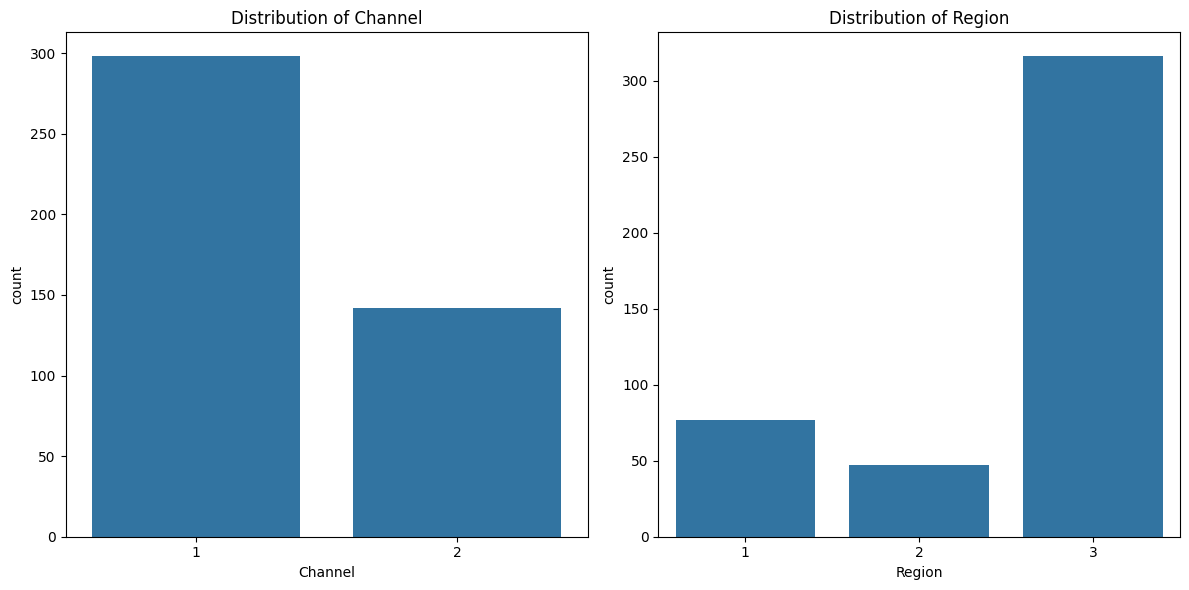

In [10]:
import seaborn as sns
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.countplot(x='Channel', data=df)
plt.title('Distribution of Channel')

plt.subplot(1, 2, 2)
sns.countplot(x='Region', data=df)
plt.title('Distribution of Region')

plt.tight_layout()
plt.show()


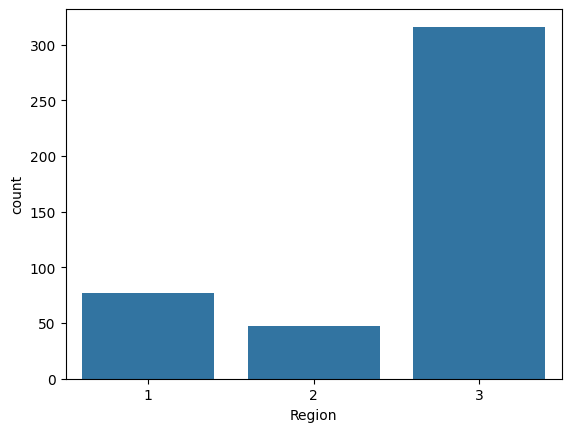

In [11]:
sns.countplot(x='Region', data=df)
plt.show()

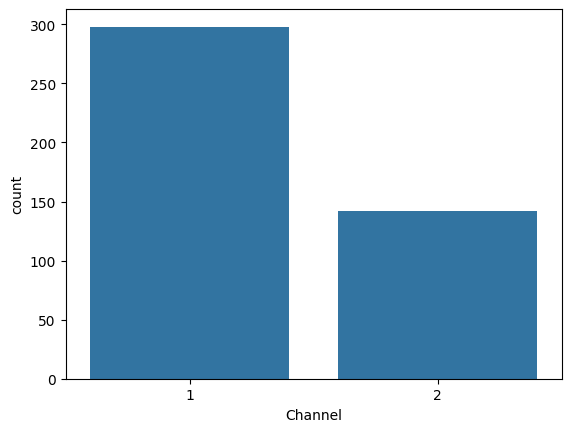

In [12]:
sns.countplot(x='Channel', data=df)
plt.show()

<ipython-input-13-3bd3fad480b0>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Fresh'])


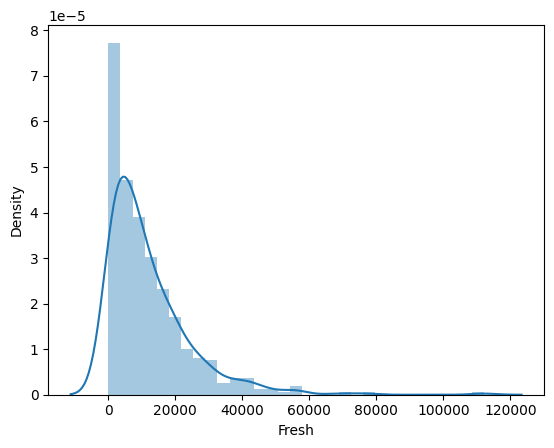

In [13]:
sns.distplot(df['Fresh'])
plt.show()

In [14]:
import warnings
warnings.filterwarnings('ignore')

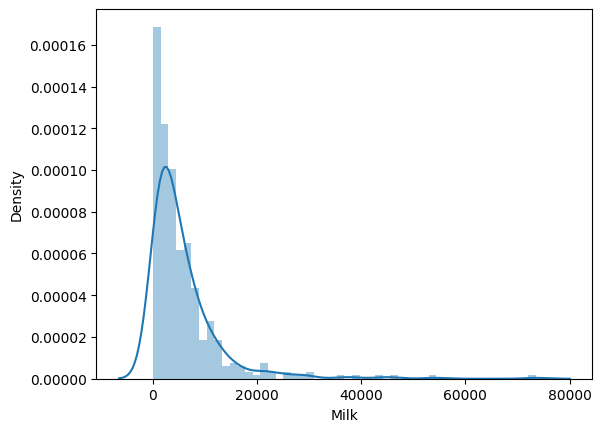

In [15]:
sns.distplot(df['Milk'])
plt.show()

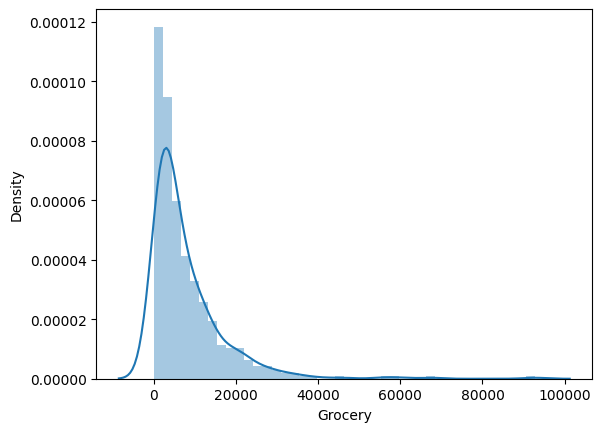

In [16]:
sns.distplot(df['Grocery'])
plt.show()

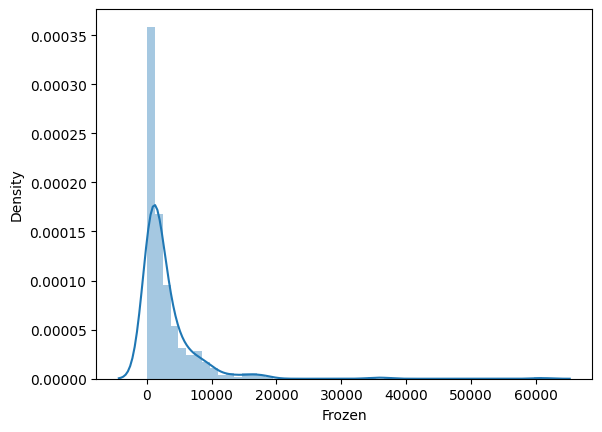

In [17]:
sns.distplot(df['Frozen'])
plt.show()

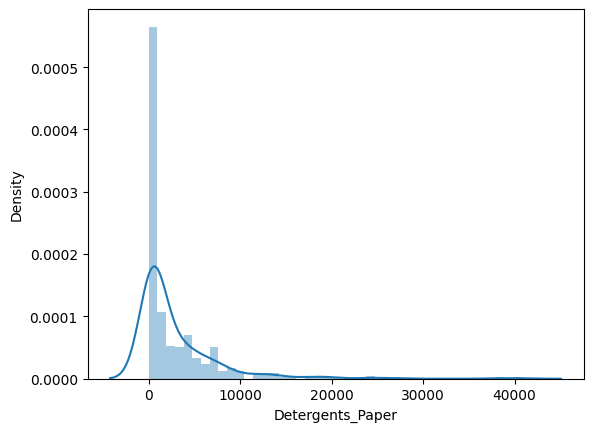

In [18]:
sns.distplot(df['Detergents_Paper'])
plt.show()


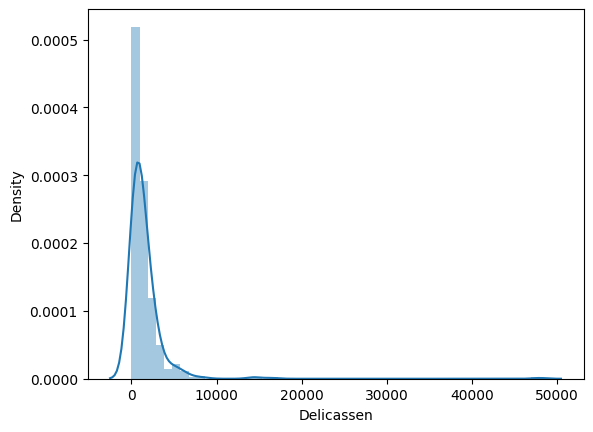

In [26]:
sns.distplot(df['Delicassen'])
plt.show()

In [27]:
df.drop(['Channel','Region'],axis=1,inplace=True)

In [28]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [32]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler()
X=stscaler.fit_transform(df)

In [34]:
  X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [36]:
X+1

array([[1.05293319, 1.52356777, 0.95888511, 0.41063284, 0.95643127,
        0.93366094],
       [0.60869803, 1.54445767, 1.17031835, 0.72986382, 1.08640684,
        1.08915105],
       [0.55297074, 1.40853771, 0.9718429 , 0.86246428, 1.13323164,
        3.24329255],
       ...,
       [1.20032554, 2.31467078, 3.34838631, 0.45662025, 3.51121768,
        1.12145607],
       [0.86461611, 0.48246428, 0.39748612, 0.58055941, 0.43022968,
        1.21304614],
       [0.27069302, 0.4440757 , 0.42677283, 0.37990583, 0.49511248,
        0.47713062]])

In [37]:
X+100

array([[100.05293319, 100.52356777,  99.95888511,  99.41063284,
         99.95643127,  99.93366094],
       [ 99.60869803, 100.54445767, 100.17031835,  99.72986382,
        100.08640684, 100.08915105],
       [ 99.55297074, 100.40853771,  99.9718429 ,  99.86246428,
        100.13323164, 102.24329255],
       ...,
       [100.20032554, 101.31467078, 102.34838631,  99.45662025,
        102.51121768, 100.12145607],
       [ 99.86461611,  99.48246428,  99.39748612,  99.58055941,
         99.43022968, 100.21304614],
       [ 99.27069302,  99.4440757 ,  99.42677283,  99.37990583,
         99.49511248,  99.47713062]])

In [39]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [40]:
X*6

array([[ 0.31759914,  3.14140664, -0.24668936, -3.53620293, -0.26141239,
        -0.39803435],
       [-2.34781182,  3.266746  ,  1.02191012, -1.62081709,  0.51844104,
         0.5349063 ],
       [-2.68217556,  2.45122624, -0.16894261, -0.82521432,  0.79938986,
        13.4597553 ],
       ...,
       [ 1.20195324,  7.88802469, 14.09031786, -3.26027849, 15.06730607,
         0.72873644],
       [-0.81230333, -3.10521434, -3.61508331, -2.51664355, -3.41862193,
         1.27827682],
       [-4.3758419 , -3.33554577, -3.439363  , -3.72056501, -3.02932514,
        -3.13721625]])

In [41]:
X

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873,
        -0.06633906],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684,
         0.08915105],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164,
         2.24329255],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768,
         0.12145607],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032,
         0.21304614],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752,
        -0.52286938]])

In [45]:
import scipy.cluster.hierarchy as sch


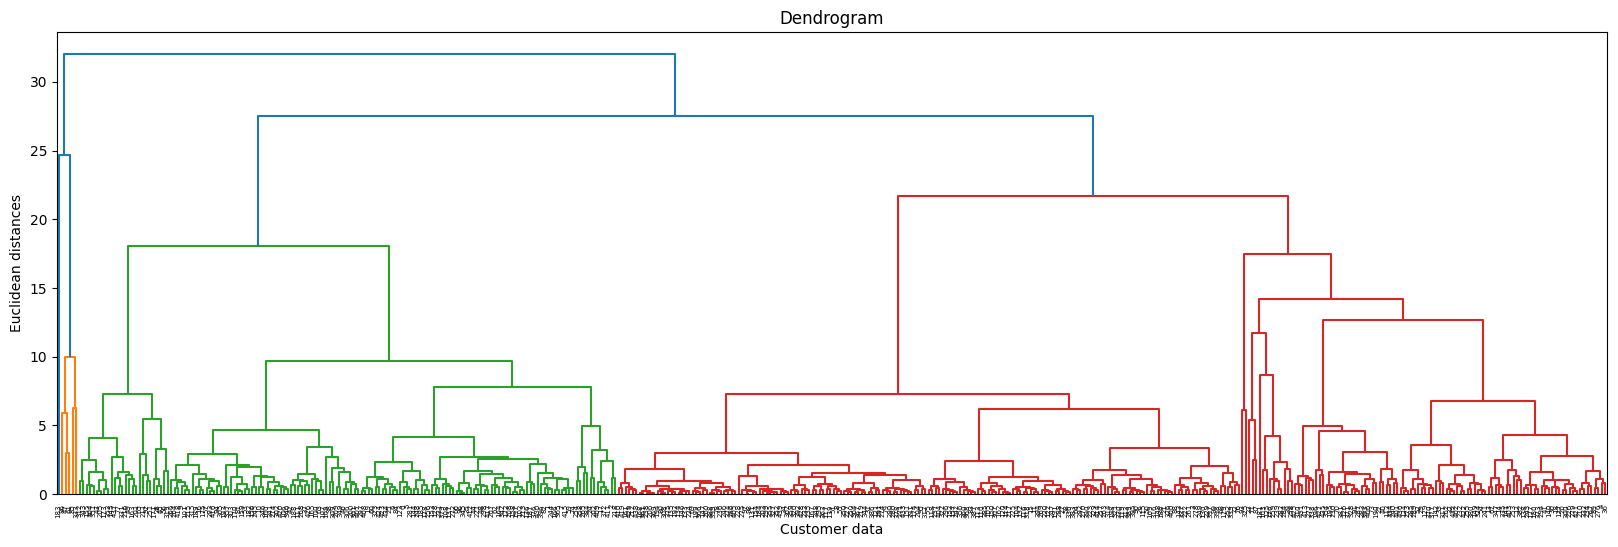

In [50]:
plt.figure(figsize=(20, 6))
dendo = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customer data')
plt.ylabel('Euclidean distances')
plt.show()

In [51]:
len(set(dendo['color_list']))

4

In [52]:
len(set(dendo['color_list']))-1

3

In [53]:
from sklearn.cluster import AgglomerativeClustering


In [56]:
model = AgglomerativeClustering(n_clusters=3)
cluster=model.fit_predict(X)

In [57]:
cluster

array([2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2,
       2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 0, 2, 2, 1, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 0, 0, 1,
       1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2,
       1, 1, 2, 1, 1, 1, 2, 0, 1, 2, 1, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,

In [60]:
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [61]:
group_num = pd.DataFrame(cluster,columns=['Gruop'])

In [62]:
group_num

,Gruop
0,2
1,2
2,2
3,1
4,1
...,...
435,1
436,1
437,2
438,1


In [65]:

pd.concat([df,group_num],axis=1)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Gruop
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [71]:
customer_group_data = pd.concat([df,group_num],axis=1)
customer_group_data

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Gruop
0,12669,9656,7561,214,2674,1338,2
1,7057,9810,9568,1762,3293,1776,2
2,6353,8808,7684,2405,3516,7844,2
3,13265,1196,4221,6404,507,1788,1
4,22615,5410,7198,3915,1777,5185,1
...,...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204,1
436,39228,1431,764,4510,93,2346,1
437,14531,15488,30243,437,14841,1867,2
438,10290,1981,2232,1038,168,2125,1


In [72]:
from sklearn.metrics import silhouette_score
silhouette_score(X,cluster)

0.2646091480214908

In [75]:
from sklearn.cluster import KMeans

wcss=[]
for i in range (2,11):
  KMeans=KMeanns(n_clusters=i,init='K-means++',random_state=42)
  KMeans.fit(X)
  wcss.append(Kmeans.inertia_)

NameError: name 'KMeanns' is not defined